In [1]:
import numpy as np
import sys
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)

In [2]:
# options for mgf
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "save_jk" : True
}


psi4.set_options(options_dict)
mol = psi4.geometry(mol_str)


In [3]:
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

cavity_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'no_cavity' : True
}

mol = psi4.geometry(mol_str)

psi4.set_options(options_dict)

test_pf = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    cavity_dict
)




Start SCF iterations:

Canonical RHF One-electron energy = -12.5626302721254959
CQED-RHF One-electron energy      = -12.5626302721254959
Nuclear repulsion energy          = 1.0583544213400000
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8633576215383263   dE = -7.86336E+00   dRMS = 3.54673E-13
SCF Iteration   2: Energy = -7.8633576215383370   dE = -1.06581E-14   dRMS = 7.99578E-14
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.86335762 hartree
Psi4  SCF energy: -7.86335762 hartree
 Completed QED-RHF in 0.35221409797668457 seconds
 Completed 1HSO Build in 0.00022220611572265625 seconds
 Completed ERI Build in 0.0011630058288574219 seconds 
 Completed 2D build in 0.00012803077697753906 seconds
 Completed 1G build in 1.4781951904296875e-05 seconds
 Completed the Dipole Matrix Build in 3.886222839355469e-05 seconds
 Completed determinant list in 0.00045490264892578125 seconds 
 Completed constant offset matrix in 0.000174045562

In [4]:
N_el = 20
test_pf.reduceCISpace()
singlet_states = test_pf.sort_dipole_allowed_states(N_el)
print(singlet_states)


[0, 2, 5, 6, 8, 14, 15, 16, 17, 21, 22, 23, 24, 26, 29, 30, 38, 40, 41, 49]


In [6]:
print(test_pf.compute_dipole_moments(singlet_states))
print(test_pf.CIeigs[singlet_states])

[[[ 1.39268461e-15  1.16301812e-15 -1.82288146e+00]
  [ 7.50236804e-15  7.43351177e-15  6.69131627e-01]
  [ 1.24542920e+00  6.60115855e-01 -4.57184430e-15]
  [ 6.60115855e-01 -1.24542920e+00  6.20687401e-16]
  [ 2.57272550e-15  4.05305125e-16  3.76232818e-01]
  [ 8.56814648e-15  1.10675877e-14  6.28943285e-01]
  [-6.09031877e-02 -9.76448927e-02  6.82675065e-14]
  [-9.76448927e-02  6.09031877e-02  1.64683767e-15]
  [ 1.32675591e-15 -2.87437460e-16  8.15924833e-02]
  [ 7.21392967e-03 -7.57645375e-02 -1.49553095e-15]
  [-7.57645375e-02 -7.21392967e-03 -1.94695467e-15]
  [ 1.86108357e-16 -4.27801400e-16  4.40126361e-02]
  [-4.47024244e-16  1.29898523e-16 -7.92363071e-02]
  [ 9.02119554e-16 -2.40455709e-15  2.15979931e-01]
  [ 1.60470820e-01 -2.54179863e-01 -1.61559480e-15]
  [-2.54179863e-01 -1.60470820e-01 -1.06877854e-16]
  [ 2.50467830e-16 -3.00124343e-16 -4.58432478e-02]
  [ 9.69499501e-03 -2.21731073e-02 -2.46309711e-16]
  [-2.21731073e-02 -9.69499501e-03  5.34259049e-16]
  [ 1.886376

In [10]:
print(test_pf.MU_Z)

[[-3.31347966e+00  3.81296251e-01  1.07088934e-15 -6.87059192e-16
  -6.20669297e-01 -1.47032006e-01 -7.94893999e-17  1.38447189e-16
  -1.07799213e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  3.81296251e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.07088934e-15  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -6.87059192e-16  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -6.20669

In [14]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

mol_str = """
Li
H 1 1.5
symmetry c1
"""

N_R = 50
N_el = 20
r_array = np.linspace(1.4, 2.2, N_R)

E_array = np.zeros((N_R, N_el))
Mu_array = np.zeros((N_R, N_el, N_el, 3))
psi4.set_options(options_dict)

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    #psi4.set_options({'restricted_docc': [3],'active': [4],'num_roots':2})
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy = psi4.energy('fci',ref_wfn=wfn)
    
    LiH = PFHamiltonianGenerator(mol_str, options_dict, cavity_dict)
    assert np.isclose(fci_energy, LiH.CIeigs[0])
    LiH.reduceCISpace()
    singlet_states = LiH.sort_dipole_allowed_states( N_el)
    E_array[r_idx, :] = LiH.CIeigs[singlet_states]
    Mu_array[r_idx, :, :, :] = LiH.compute_dipole_moments(singlet_states)
    r_idx += 1
    
    
    #CASCI_E_array.append(H2_PF.CIeigs[0])
    #FCI_E_array.append(fci_energy)
    #print(r, H2_PF.CIeigs[0])



Li
H 1 1.4
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236295895
CQED-RHF One-electron energy      = -12.6946346236295895
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8605386610570385   dE = -7.86054E+00   dRMS = 1.78770E-13
SCF Iteration   2: Energy = -7.8605386610570473   dE = -8.88178E-15   dRMS = 3.97284E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86053866 hartree
Psi4  SCF energy: -7.86053866 hartree
 Completed QED-RHF in 0.08617901802062988 seconds
 Completed 1HSO Build in 6.318092346191406e-05 seconds
 Completed ERI Build in 0.001277923583984375 seconds 
 Completed 2D build in 8.487701416015625e-05 seconds
 Completed 1G build in 1.811981201171875e-05 seconds
 Completed the Dipole Matrix Build in 4.220008850097656e-05 seconds
 Completed determinant list in 0.0004999637603759766 seconds 
 Completed constant offset matr

 Completed Hamiltonian build in 0.3419790267944336 seconds

Li
H 1 1.530612244897959
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.5241587898228026
CQED-RHF One-electron energy      = -12.5241587898228026
Nuclear repulsion energy          = 1.0371873329132002
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8633023030157272   dE = -7.86330E+00   dRMS = 2.68148E-13
SCF Iteration   2: Energy = -7.8633023030157201   dE =  7.10543E-15   dRMS = 5.97575E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86330230 hartree
Psi4  SCF energy: -7.86330230 hartree
 Completed QED-RHF in 0.08797311782836914 seconds
 Completed 1HSO Build in 2.6941299438476562e-05 seconds
 Completed ERI Build in 0.0011298656463623047 seconds 
 Completed 2D build in 7.390975952148438e-05 seconds
 Completed 1G build in 1.430511474609375e-05 seconds
 Completed the Dipole Matrix Build in 3.886222839355469e-05 seconds
 Completed determi

 Completed Hamiltonian build in 0.34096384048461914 seconds

Li
H 1 1.6612244897959183
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.3692821733550495
CQED-RHF One-electron energy      = -12.3692821733550495
Nuclear repulsion energy          = 0.9556394345023342
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8593008679750440   dE = -7.85930E+00   dRMS = 2.89643E-15
SCF Iteration   2: Energy = -7.8593008679750422   dE =  1.77636E-15   dRMS = 7.61755E-16
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.85930087 hartree
Psi4  SCF energy: -7.85930087 hartree
 Completed QED-RHF in 0.08943295478820801 seconds
 Completed 1HSO Build in 3.266334533691406e-05 seconds
 Completed ERI Build in 0.001177072525024414 seconds 
 Completed 2D build in 7.295608520507812e-05 seconds
 Completed 1G build in 1.52587890625e-05 seconds
 Completed the Dipole Matrix Build in 3.981590270996094e-05 seconds
 Completed determinant

 Completed Hamiltonian build in 0.34297609329223633 seconds

Li
H 1 1.7918367346938777
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.2279483802846354
CQED-RHF One-electron energy      = -12.2279483802846354
Nuclear repulsion energy          = 0.8859800679782459
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8506745764107793   dE = -7.85067E+00   dRMS = 5.05083E-15
SCF Iteration   2: Energy = -7.8506745764107757   dE =  3.55271E-15   dRMS = 1.33471E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.85067458 hartree
Psi4  SCF energy: -7.85067458 hartree
 Completed QED-RHF in 0.09036612510681152 seconds
 Completed 1HSO Build in 2.8133392333984375e-05 seconds
 Completed ERI Build in 0.0011560916900634766 seconds 
 Completed 2D build in 9.870529174804688e-05 seconds
 Completed 1G build in 1.5020370483398438e-05 seconds
 Completed the Dipole Matrix Build in 4.887580871582031e-05 seconds
 Completed dete

 Completed Hamiltonian build in 0.3426401615142822 seconds

Li
H 1 1.9224489795918367
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.0985141762878570
CQED-RHF One-electron energy      = -12.0985141762878570
Nuclear repulsion energy          = 0.8257860930837581
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8389192441347433   dE = -7.83892E+00   dRMS = 5.36166E-15
SCF Iteration   2: Energy = -7.8389192441347486   dE = -5.32907E-15   dRMS = 1.35759E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.83891924 hartree
Psi4  SCF energy: -7.83891924 hartree
 Completed QED-RHF in 0.09013891220092773 seconds
 Completed 1HSO Build in 2.6941299438476562e-05 seconds
 Completed ERI Build in 0.0011260509490966797 seconds 
 Completed 2D build in 8.988380432128906e-05 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 4.100799560546875e-05 seconds
 Completed deter

 Completed Hamiltonian build in 0.33985209465026855 seconds

Li
H 1 2.053061224489796
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.9796907659129843
CQED-RHF One-electron energy      = -11.9796907659129843
Nuclear repulsion energy          = 0.7732509937225647
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8250927429137160   dE = -7.82509E+00   dRMS = 3.20782E-15
SCF Iteration   2: Energy = -7.8250927429137231   dE = -7.10543E-15   dRMS = 9.34040E-16
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.82509274 hartree
Psi4  SCF energy: -7.82509274 hartree
 Completed QED-RHF in 0.08949470520019531 seconds
 Completed 1HSO Build in 2.6941299438476562e-05 seconds
 Completed ERI Build in 0.0011281967163085938 seconds 
 Completed 2D build in 0.00010085105895996094 seconds
 Completed 1G build in 1.3113021850585938e-05 seconds
 Completed the Dipole Matrix Build in 3.981590270996094e-05 seconds
 Completed dete

 Completed Hamiltonian build in 0.3413660526275635 seconds

Li
H 1 2.183673469387755
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.8704521229909687
CQED-RHF One-electron energy      = -11.8704521229909687
Nuclear repulsion energy          = 0.7270004669952337
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8099506130038581   dE = -7.80995E+00   dRMS = 6.41765E-15
SCF Iteration   2: Energy = -7.8099506130038581   dE =  0.00000E+00   dRMS = 1.84787E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.80995061 hartree
Psi4  SCF energy: -7.80995061 hartree
 Completed QED-RHF in 0.09289979934692383 seconds
 Completed 1HSO Build in 2.7894973754882812e-05 seconds
 Completed ERI Build in 0.0011970996856689453 seconds 
 Completed 2D build in 9.393692016601562e-05 seconds
 Completed 1G build in 1.71661376953125e-05 seconds
 Completed the Dipole Matrix Build in 3.981590270996094e-05 seconds
 Completed determin

In [15]:
from matplotlib import pyplot as plt


[1.4        1.41632653 1.43265306 1.44897959 1.46530612 1.48163265
 1.49795918 1.51428571 1.53061224 1.54693878 1.56326531 1.57959184
 1.59591837 1.6122449  1.62857143 1.64489796 1.66122449 1.67755102
 1.69387755 1.71020408 1.72653061 1.74285714 1.75918367 1.7755102
 1.79183673 1.80816327 1.8244898  1.84081633 1.85714286 1.87346939
 1.88979592 1.90612245 1.92244898 1.93877551 1.95510204 1.97142857
 1.9877551  2.00408163 2.02040816 2.03673469 2.05306122 2.06938776
 2.08571429 2.10204082 2.11836735 2.13469388 2.15102041 2.16734694
 2.18367347 2.2       ]
[0.14221792 0.14162321 0.14099345 0.14033042 0.13963584 0.1389114
 0.13815872 0.13737938 0.13657493 0.13574686 0.13489661 0.13402559
 0.13313517 0.13222666 0.13130135 0.13036048 0.12940526 0.12843685
 0.12745639 0.12646497 0.12546368 0.12445353 0.12343555 0.1224107
 0.12137995 0.12034421 0.11930439 0.11826138 0.11721602 0.11616917
 0.11512164 0.11407423 0.11302774 0.11198294 0.11094058 0.10990141
 0.10886617 0.10783559 0.10681036 0.10579

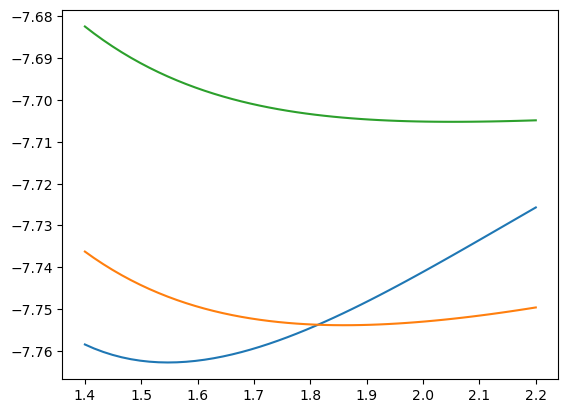

In [16]:
print(r_array)
print(E_array[:,1]-E_array[:,0])

plt.plot(r_array, E_array[:,0]+0.120000)
plt.plot(r_array, E_array[:,1])
plt.plot(r_array, E_array[:,2])

plt.show()

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [17]:
def build_pf_hamiltonian(n_el, n_ph, E_R, omega, lamvec, mu):
    """
    Given an array of n_el E_R values and an n_ph states with fundamental energy omega
    build the PF Hamiltonian
    
    n_el : int
        the number of electronic states (n_el = 1 means only ground-state)
    
    n_ph : int
        the number of photon occupation states (n_ph = 1 means only the |0> state)
    
    E_R : np.array of floats
        the electronic energies
        
    omega : float
        the energy of the photonic mode
        
    lamvec : np.array of floats
        the lambda vector
        
    mu : (n_el x n_el x 3) np.array of floats 
        mu[i, j, k] is the kth cartesian component of the dipole moment expectation value between 
        state i and state j
    
    """
    H_PF = np.zeros((n_el * n_ph, n_el * n_ph))
    
    # take care of the diagonals first
    # bare electronic and photonic energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            H_PF[na,na] = E_R[a] + n * omega
        
    # diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for g in range(n_el):
                H_PF[na,na] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g,a,:])
            
    # off-diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for b in range(n_el):
                nb = n * n_el + b
                for g in range(n_el):
                    if a != b:
                        H_PF[na, nb] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g, b, :])
                
    # off-diagonal bilinear coupling
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            
            for m in range(n_ph):
                for b in range(n_el):
                    mb = m * n_el + b
                    
                    if n == (m-1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na,mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        
                    elif n == (m+1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na, mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1)
                        
    
    return H_PF
                
            
    
        
    
    

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [24]:
np.set_printoptions(precision=6, linewidth=200, suppress=True)
omega_cav = 0.120000
lambda_vector = np.array([0, 0.0, 0.05])
N_el = 5
N_ph = 2
# Just manually computing some elements!
#print("E")
#print(E_array[0,:2], E_array[0,:2]+0.12, E_array[0,:2]+2*0.12)

#g_12 = np.sqrt(omega_cav / 2) * np.dot(lambda_vector, Mu_array[0, 0, 1, :]) * np.sqrt(2)
#D_01 = 0.5 * np.dot(lambda_vector, Mu_array[0, 0, 0, :]) * np.dot(lambda_vector, Mu_array[0, 1, 0, :]) 
#D_01 += 0.5 * np.dot(lambda_vector, Mu_array[0, 0, 1, :]) * np.dot(lambda_vector, Mu_array[0, 1, 1, :])
#print("g12 * 1")
#print(g_12)
#print("D01")
#print(D_01)
#+E_array[0,1])

_HPF = build_pf_hamiltonian(N_el, N_ph, E_array[0,:], omega_cav, lambda_vector, Mu_array[0, :, :, :])
print("H")
print(_HPF)

H
[[-7.873706 -0.000106 -0.       -0.        0.000382  0.       -0.007386  0.        0.       -0.003736]
 [-0.000106 -7.732118 -0.       -0.       -0.000044 -0.007386  0.        0.        0.        0.00058 ]
 [-0.       -0.       -7.682394  0.       -0.        0.        0.        0.       -0.        0.      ]
 [-0.       -0.        0.       -7.682394 -0.        0.        0.       -0.        0.        0.      ]
 [ 0.000382 -0.000044 -0.       -0.       -7.279129 -0.003736  0.00058   0.        0.        0.      ]
 [ 0.       -0.007386  0.        0.       -0.003736 -7.753706 -0.000106 -0.       -0.        0.000382]
 [-0.007386  0.        0.        0.        0.00058  -0.000106 -7.612118 -0.       -0.       -0.000044]
 [ 0.        0.        0.       -0.        0.       -0.       -0.       -7.562394  0.       -0.      ]
 [ 0.        0.       -0.        0.        0.       -0.       -0.        0.       -7.562394 -0.      ]
 [-0.003736  0.00058   0.        0.        0.        0.000382 -0.000044

In [19]:
N_el = 6
N_ph = 4

PF_EIG = np.zeros((N_R, N_el * N_ph))

In [20]:

for i in range(N_R):
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[i,:], omega_cav, lambda_vector, Mu_array[i, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    PF_EIG[i,:] = pf_e
    print(r_array[i], pf_e[0], pf_e[1],  pf_e[2], pf_e[2])

1.4 -7.873627152887874 -7.756190312201736 -7.729166043035704 -7.729166043035704
1.4163265306122448 -7.874562248508866 -7.757262523661146 -7.730567115241893 -7.730567115241893
1.4326530612244897 -7.875361103078303 -7.758207784678515 -7.7318593956779775 -7.7318593956779775
1.4489795918367345 -7.876030537778752 -7.759033669179541 -7.733047066639927 -7.733047066639927
1.4653061224489796 -7.876577048973588 -7.759747490834279 -7.734133971775618 -7.734133971775618
1.4816326530612245 -7.877006827556565 -7.760356325193096 -7.735123633056283 -7.735123633056283
1.4979591836734694 -7.8773257768975355 -7.760867029575956 -7.736019266799177 -7.736019266799177
1.5142857142857142 -7.877539529489917 -7.761286260460852 -7.7368237992607805 -7.7368237992607805
1.530612244897959 -7.87765346240097 -7.7616204880406885 -7.737539882387239 -7.737539882387239
1.546938775510204 -7.877672711620623 -7.76187600754317 -7.738169910367052 -7.738169910367052
1.5632653061224488 -7.87760218539925 -7.762058946848616 -7.7387

In [ ]:
#plt.plot(r_array, PF_EIG[:,0])
#plt.plot(r_array, E_array[:,1])
plt.plot(r_array, PF_EIG[:,1], 'r--')
plt.plot(r_array, PF_EIG[:,2], 'b--')
#plt.plot(r_array, E_array[:,0]+omega_cav)
#plt.plot(r_array, E_array[:,2])
plt.plot(r_array, E_array[:,3])
#plt.plot(r_array, PF_EIG[:,3])
#plt.plot(r_array, PF_EIG[:,4])
#plt.plot(r_array, PF_EIG[:,5])





In [ ]:
pf_e, pf_c = np.linalg.eigh(_HPF)
print(pf_e)

In [ ]:
print(pf_e[2]-pf_e[0])
#print(pf_e[3])
print(omega_cav)
#print(pf_e[1]-pf_e[0])
#print(pf_e[2]-pf_e[1])

In [ ]:
expected_mghp_g_e = -199.86358254419457
expected_mghp_lp_e = -199.69776087489558
expected_mghp_up_e = -199.68066502792058

print(expected_mghp_lp_e-expected_mghp_g_e)
print(expected_mghp_up_e-expected_mghp_lp_e)

In [55]:
np.set_printoptions(precision=3, linewidth=200, suppress=True)
_Np = 6
_numDets = 3
_compDim = _Np * _numDets
o = np.eye(_numDets) * 0.1
print(o)
b1 = np.ones((_numDets, _numDets))
b2 = 0.5 * b1
H = np.zeros((_compDim, _compDim))
print(H)

[[0.1 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.1]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [59]:
H = np.zeros((_compDim, _compDim))
print(H)
for i in range(_Np):
    bra_b = i * _numDets
    bra_e = bra_b + _numDets
    for j in range(i, _Np):
        ket_b = j * _numDets
        ket_e = ket_b + _numDets
        if i==j:
            H[bra_b:bra_e, ket_b:ket_e] = b1 + o * j
        elif i==j+1:
            H[bra_b:bra_e, ket_b:ket_e] = b2 * np.sqrt(j)
            H[ket_b:ket_e, bra_b:bra_e] = b2 * np.sqrt(j)
        elif i==j-1:
            H[bra_b:bra_e, ket_b:ket_e] = b2 * np.sqrt(j+1)
            H[ket_b:ket_e, bra_b:bra_e] = b2 * np.sqrt(j+1)

            
print(H)           
        

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.